# Summer of Code - Artificial Intelligence
## Week 06: Logistic Regression

### Day 05: Multiclass Classification

In this notebook, we will explore **Multiclass Classification** using Python's Scikit-Learn library.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Better plots
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# The Iris Dataset

The **Iris dataset** is one of the most famous datasets in machine learning. It contains measurements of iris flowers from three different species.

## Dataset Overview
- **Features**: 4 measurements (sepal length, sepal width, petal length, petal width)
- **Target**: 3 species (setosa, versicolor, virginica)
- **Samples**: 150 (50 per class)


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
# Features and target
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset Information:")
print("=" * 50)
print(f"Shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")

Dataset Information:
Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


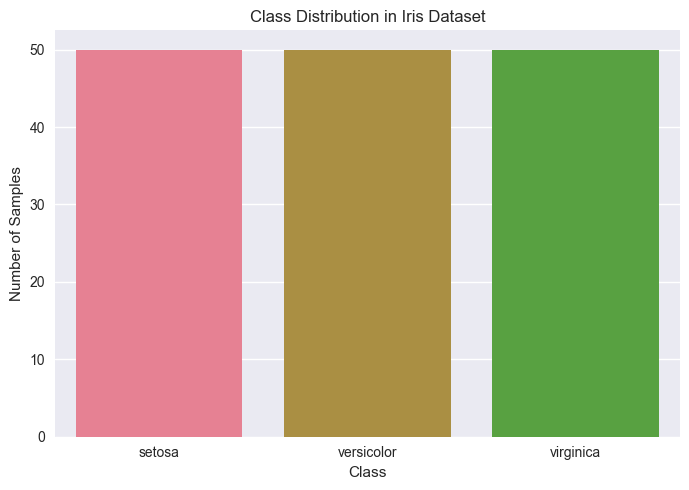

In [14]:
class_count = np.bincount(y)

plt.figure(figsize=(7, 5))
sns.barplot(x=target_names, y=class_count, hue=target_names)
plt.title("Class Distribution in Iris Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

In [15]:
# DataFrame for easier analysis
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# Basic statistics
print("Dataset Statistics:")
df.describe()

Dataset Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the Dataset

Let's create visualizations to understand the relationships between features:


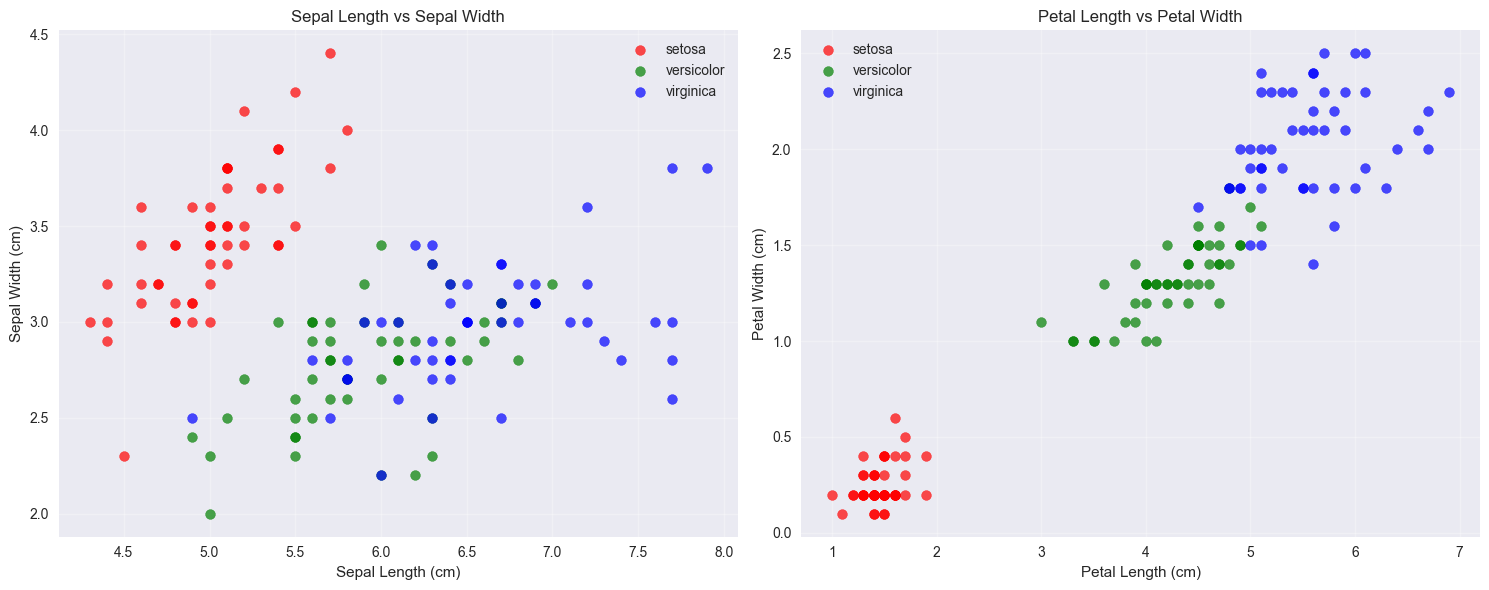

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pairwise scatter plots
ax1 = axes[0]
colors = ["red", "green", "blue"]
for i, species in enumerate(target_names):
    mask = df["species"] == species
    ax1.scatter(
        df[mask]["sepal length (cm)"],
        df[mask]["sepal width (cm)"],
        c=colors[i],
        label=species,
        alpha=0.7,
        s=50,
    )
ax1.set(
    xlabel="Sepal Length (cm)",
    ylabel="Sepal Width (cm)",
    title="Sepal Length vs Sepal Width",
)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Petal measurements
ax2 = axes[1]
for i, species in enumerate(target_names):
    mask = df["species"] == species
    ax2.scatter(
        df[mask]["petal length (cm)"],
        df[mask]["petal width (cm)"],
        c=colors[i],
        label=species,
        alpha=0.7,
        s=50,
    )
ax2.set(
    xlabel="Petal Length (cm)",
    ylabel="Petal Width (cm)",
    title="Petal Length vs Petal Width",
)
ax2.legend()
ax2.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# Multiclass Classification

**Multiclass Classification** is a supervised learning problem where we predict one of **three or more classes** for each instance.

## Key Differences from Binary Classification:

| Aspect | Binary Classification | Multiclass Classification |
|--------|---------------------|---------------------------|
| **Classes** | 2 classes (0, 1) | 3+ classes (0, 1, 2, ...) |
| **Output** | Single probability | Multiple probabilities |
| **Decision** | Threshold at 0.5 | Highest probability wins |
| **Complexity** | Simpler | More complex |



## Approaches to Multiclass Classification:

1. **One-vs-Rest (OvR)**: Train one binary classifier to distinguish each class from all others. The class with the highest confidence score is chosen.
2. **One-vs-One (OvO)**: Train one classifier for each pair of classes, resulting in multiple classifiers. The class that wins the most pairwise comparisons is chosen.
3. **Multinomial**: Direct multiclass approach where a single model predicts all classes simultaneously. Actually, you can also see this as training multiple logistic regression models, one for each classs, but instead of predicting a binary outcome, each model predicts the probability of its respective class. The class with the highest predicted probability is chosen as the final output.

### How Logistic Regression Handles Multiclass

For **3 classes** (like our Iris dataset), logistic regression:

1. **Calculates probabilities** for each class: P(class 0), P(class 1), P(class 2)
2. **Ensures probabilities sum to 1**: P(class 0) + P(class 1) + P(class 2) = 1
3. **Predicts the class** with the highest probability

### Mathematical Foundation

Instead of one sigmoid function, we use the **softmax function**:

$$P(y = k) = \frac{e^{z_k}}{\sum_{j=0}^{K-1} e^{z_j}}$$

Where:
- $z_k$ is the linear combination for class k
- $K$ is the number of classes
- The denominator ensures probabilities sum to 1


In [23]:
# Demonstrate softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

# Example: Linear combinations for 3 classes
z_example = np.array([2.0, 1.0, 0.5])  # Scores for 3 classes
probabilities = softmax(z_example)

print(f"Linear combinations (z): {z_example}")
print(f"Probabilities: {probabilities}")
print(f"Sum of probabilities: {np.sum(probabilities):.6f}")


Linear combinations (z): [2.  1.  0.5]
Probabilities: [0.62853172 0.2312239  0.14024438]
Sum of probabilities: 1.000000


## Implementing Multiclass Logistic Regression

Now let's implement logistic regression for multiclass classification on the Iris dataset.


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")


Training set size: 105 samples
Test set size: 45 samples
Features: 4


In [26]:
from sklearn.linear_model import LogisticRegression

# Use multinomial for true multiclass classification
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000
)

# Train the model
log_reg.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Number of iterations: {log_reg.n_iter_[0]}")
print(f"Model converged: {log_reg.n_iter_[0] < 1000}")


Model trained successfully!
Number of iterations: 109
Model converged: True


In [29]:
# Display model coefficients
print("Each class has its own set of coefficients")
coef_matrix = log_reg.coef_
intercepts = log_reg.intercept_

print("Coefficient Matrix (rows = classes, columns = features):")
print("Classes:", target_names)
print(coef_matrix)
print()

print("Intercepts (bias terms):")
for i, (class_name, intercept) in enumerate(zip(target_names, intercepts)):
    print(f"{class_name:12s}: {intercept:8.4f}")


Each class has its own set of coefficients
Coefficient Matrix (rows = classes, columns = features):
Classes: ['setosa' 'versicolor' 'virginica']
[[-0.54508428  0.76445095 -2.2289409  -0.97457744]
 [ 0.42116825 -0.42711732 -0.10046524 -0.83878117]
 [ 0.12391603 -0.33733363  2.32940614  1.81335861]]

Intercepts (bias terms):
setosa      :   9.9278
versicolor  :   2.4229
virginica   : -12.3506


### Making Predictions

Let's see how the model makes predictions and examine the probability outputs:


In [38]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

print("Prediction Examples:")
print("=" * 80)
print(
    "Sample |   Actual   |  Predicted | Probabilities [Setosa, Versicolor, Virginica]"
)
print("-" * 80)

# Show first 5 predictions
for i in range(min(5, len(X_test))):
    actual = target_names[y_test[i]]
    predicted = target_names[y_pred[i]]
    probs = y_pred_proba[i]

    print(
        f"{i+1:6d} | {actual:10s} | {predicted:10s} | [{probs[0]:.3f}, {probs[1]:.3f}, {probs[2]:.3f}]"
    )

Prediction Examples:
Sample |   Actual   |  Predicted | Probabilities [Setosa, Versicolor, Virginica]
--------------------------------------------------------------------------------
     1 | virginica  | virginica  | [0.000, 0.032, 0.968]
     2 | versicolor | versicolor | [0.005, 0.764, 0.232]
     3 | virginica  | versicolor | [0.001, 0.506, 0.493]
     4 | versicolor | versicolor | [0.005, 0.662, 0.333]
     5 | virginica  | virginica  | [0.002, 0.410, 0.589]


## Model Evaluation

Let's evaluate our multiclass logistic regression model using various metrics:


In [40]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Accuracy:  0.9333
Precision: 0.9345
Recall:    0.9333
F1-Score:  0.9333


In [43]:
from sklearn.metrics import classification_report

# Detailed classification report

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



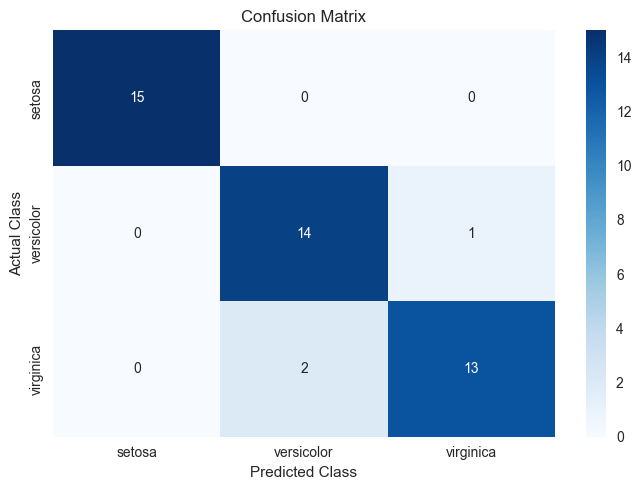

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=target_names,
    yticklabels=target_names,
)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## Visualizations for Multiclass Classification

Let's create comprehensive visualizations to understand our multiclass model:


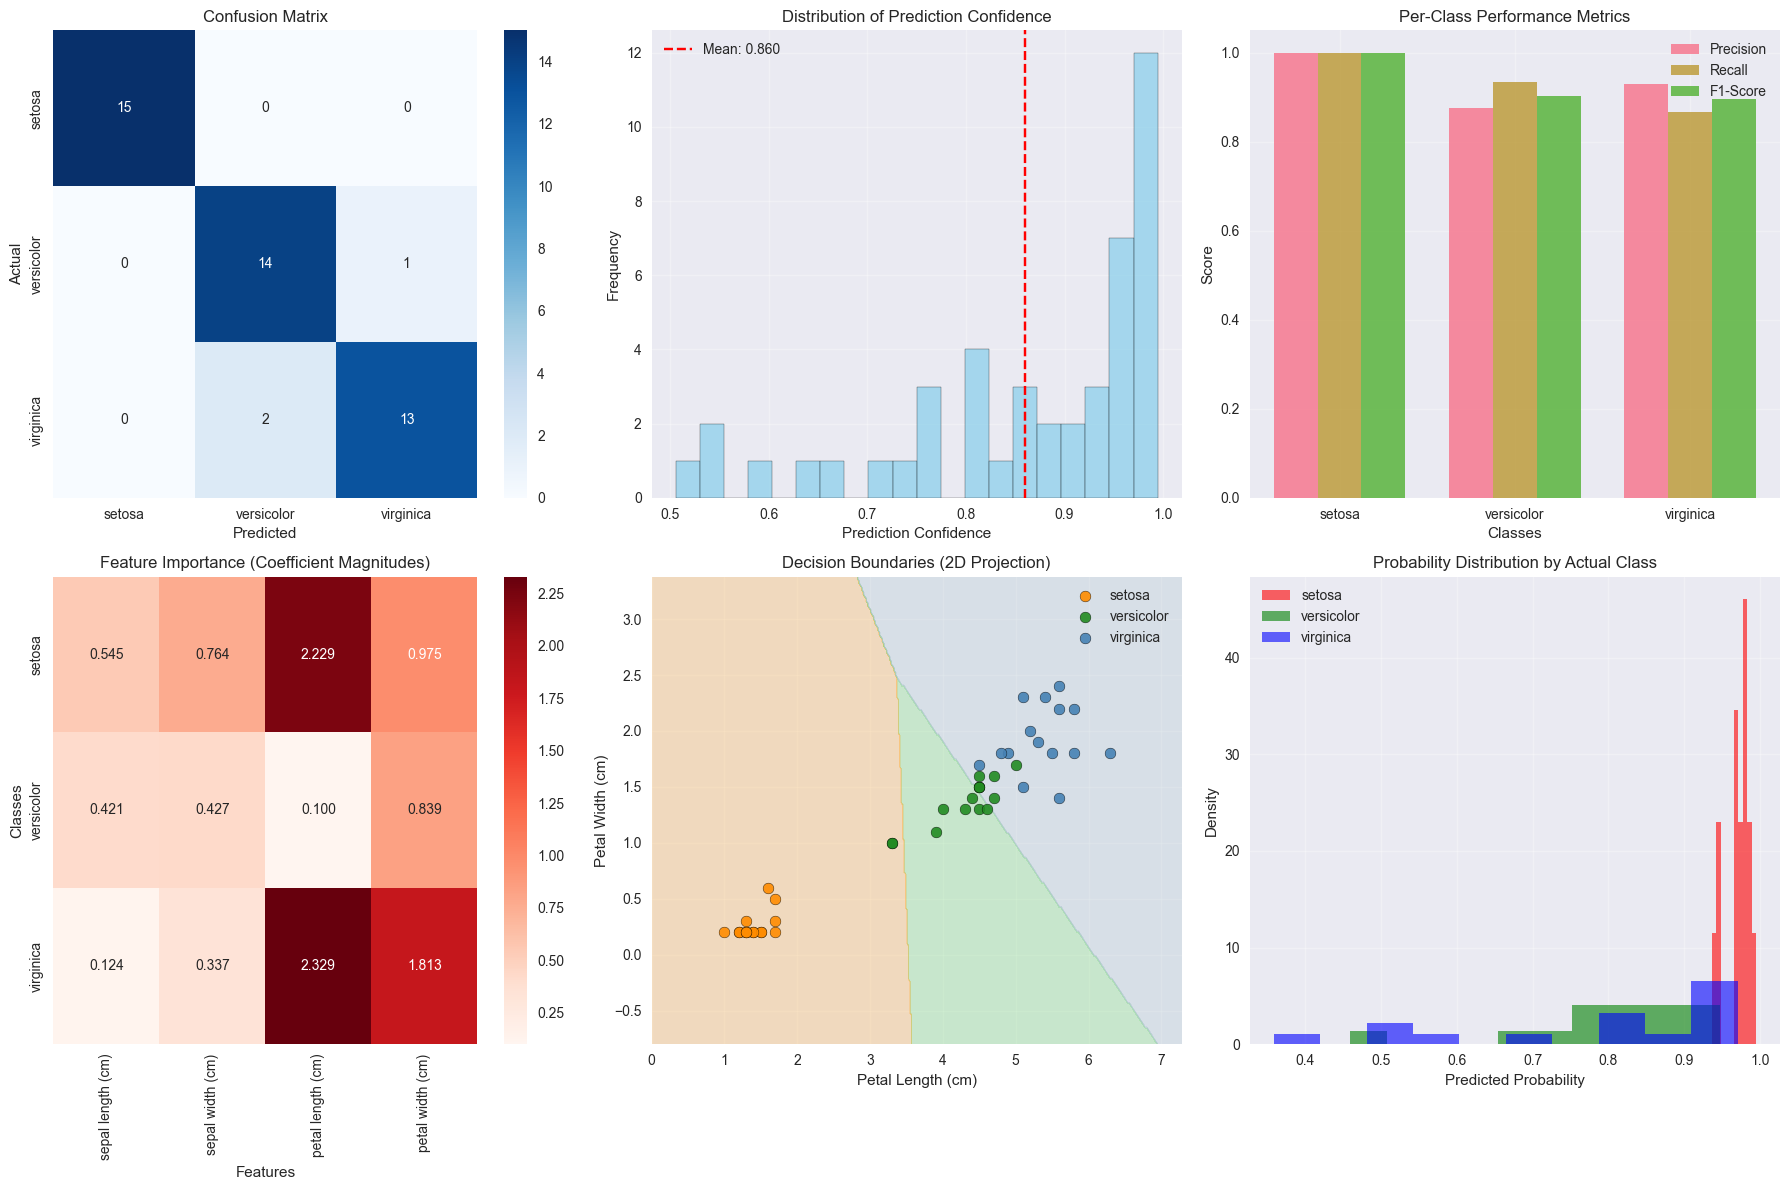

In [62]:
from matplotlib.colors import ListedColormap


# Comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Confusion Matrix Heatmap
ax1 = axes[0, 0]
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=target_names,
    yticklabels=target_names,
    ax=ax1,
)
ax1.set(xlabel="Predicted", ylabel="Actual", title="Confusion Matrix")

# Prediction Confidence Distribution
confidence = np.max(y_pred_proba, axis=1)
ax2 = axes[0, 1]
ax2.hist(confidence, bins=20, alpha=0.7, color="skyblue", edgecolor="black")
ax2.axvline(
    np.mean(confidence),
    color="red",
    linestyle="--",
    label=f"Mean: {np.mean(confidence):.3f}",
)
ax2.set(
    xlabel="Prediction Confidence",
    ylabel="Frequency",
    title="Distribution of Prediction Confidence",
)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Per-Class Performance Comparison
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

ax3 = axes[0, 2]
metrics = ["Precision", "Recall", "F1-Score"]
x = np.arange(len(target_names))
width = 0.25

for i, metric in enumerate(metrics):
    if metric == "Precision":
        values = precision_per_class
    elif metric == "Recall":
        values = recall_per_class
    else:
        values = f1_per_class

    ax3.bar(x + i * width, values, width, label=metric, alpha=0.8)

ax3.set(
    xlabel="Classes",
    ylabel="Score",
    title="Per-Class Performance Metrics",
    xticks=x + width,
    xticklabels=target_names,
)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Feature Importance (Coefficient Magnitudes)
ax4 = axes[1, 0]
coef_abs = np.abs(coef_matrix)
coef_df = pd.DataFrame(coef_abs, index=target_names, columns=feature_names)
sns.heatmap(coef_df, annot=True, fmt=".3f", cmap="Reds", ax=ax4)
ax4.set(
    title="Feature Importance (Coefficient Magnitudes)",
    xlabel="Features",
    ylabel="Classes",
)

# Decision Boundaries (2D projection)
ax5 = axes[1, 1]
# Use petal length and width for visualization
feature_indices = [2, 3]  # petal length, petal width
X_2d = X_test[:, feature_indices]

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create full feature matrix for prediction
mesh_points = np.zeros((xx.ravel().shape[0], 4))
mesh_points[:, feature_indices] = np.c_[xx.ravel(), yy.ravel()]

# Get predictions for mesh
Z = log_reg.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plot decision regions using a colormap

boundary_cmap = ListedColormap(["#FFB347", "#77DD77", "#AEC6CF"])  # orange, green, blue

ax5.contourf(xx, yy, Z, alpha=0.3, cmap=boundary_cmap)

# Plot test points with new color palette
scatter_colors = [
    "#FF8C00",
    "#228B22",
    "#4682B4",
]  # dark orange, forest green, steel blue
for i, color in enumerate(scatter_colors):
    mask = y_test == i
    ax5.scatter(
        X_2d[mask, 0],
        X_2d[mask, 1],
        c=color,
        marker="o",
        label=target_names[i],
        edgecolor="black",
        alpha=0.9,
        s=60,
    )

ax5.set(
    xlabel="Petal Length (cm)",
    ylabel="Petal Width (cm)",
    title="Decision Boundaries (2D Projection)",
)
ax5.legend()
ax5.grid(True, alpha=0.3)

# Probability Distribution for Each Class
ax6 = axes[1, 2]
for i, class_name in enumerate(target_names):
    class_mask = y_test == i
    class_probs = y_pred_proba[class_mask, i]
    ax6.hist(
        class_probs, bins=10, alpha=0.6, label=class_name, color=colors[i], density=True
    )

ax6.set(
    xlabel="Predicted Probability",
    ylabel="Density",
    title="Probability Distribution by Actual Class",
)
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()